# Projekt

In [698]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [699]:
dod_df = pd.read_csv('/Users/majaelmqvist/Documents/Statistisk databehandling/su-mt4007/dodsorsaker.csv', sep= ';').reset_index()
#dod_df

Efter en första anblick på datan ser vi att första raden är den som vi vill ha som kolumner. Vi börjar därför med att göra första raden i data framen till kolumner. Vi tar sedan bort första raden från datan så den inte finns med dubbelt. Vi tar även bort sista raden då den endast specificerar när datan hämtades.

In [700]:
dod_df.columns = dod_df.iloc[0]
new_dod_df = dod_df[1:-1].reset_index(drop=True)
#new_dod_df

Vi behöver nu göra om cellerna till siffror, de är just nu som strängar. Vi måste börja med att ersätta alla kommatecken med punkter. Detta gör vi med higher-order funktionen map.

In [701]:
new_dod_df.iloc[:, 2:] = new_dod_df.iloc[:, 2:].applymap(lambda cell: cell.replace(',','.'))

Vi konverterar nu alla kolumner förutom de två första till numeriska värden.

In [702]:
new_dod_df.iloc[:,2:] = new_dod_df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
#new_dod_df

Vi kan nu se att det saknas data för vissa år och dödsorsaker. Tillexempel finns det ingen data för Covid-19 innan 2020, vilket inte är konstigt eftersom det var då pandemin startade. Vidare finns det av naturliga skäl ingen data för antalet döda i graviditet, förlossning och barnsämgstiod för män. Vi börjar därför med att ersätta samtliga Nan värden i dessa rader med 0.

In [703]:
new_dod_df.iloc[[2,3,34]] = new_dod_df.iloc[[2,3,34]].fillna(0.0)
#new_dod_df

Vi behöver nu hantera saknad data för de dödsorsaker där det inte är lika uppenbart varför det saknas data. Vi kan tänka oss att det är ungefär lika många som dör vid närliggande år. Vi väljer därför att forward filla. För att undvika att råka fylla på med en sträng ('Män' elller 'Kvinnor') så fyller vi endast på från år 1997.

In [704]:
new_dod_df.iloc[:, 2:] = new_dod_df.iloc[:, 2:].ffill(axis=1)
#new_dod_df.info()

Från info() ovan ser vi att det finns två Nan kvar i kolumnen 1997, detta eftersom de inte fylldes på med något eftersom de var först. Vi ersätter därför dem med värdet från 1998, det kan vi göra genom att backward filla.

In [705]:
cleaned_df = new_dod_df.bfill(axis=1)
cleaned_df.iloc[0,0]

'Alkoholrelaterad dödlighet'

Vi har nu behandlat saknad data. För att göra det lättare att läsa dödsorsakerna så kan vi ta bort den ICD-10 kod som står framför de flesta. Detta gör vi med regex.

In [749]:
ICD_10_code = r'[A-Z][0-9][^ ]* '

cleaned_df['Diagnos'] = cleaned_df['Diagnos'].apply(lambda cell: re.sub(ICD_10_code, '', cell))
a = cleaned_df[['Diagnos', 'Kön', '1997', '2023']]
sns.barplot(x = 'Diagnos', y = '1997', )

,Diagnos,Kön,1997,2023
0,Alkoholrelaterad dödlighet,Män,35.33,30.44
1,Alkoholrelaterad dödlighet,Kvinnor,7.89,10.57
2,Covid­19 (virus påvisat och virus ej påvisat),Män,0.00,23.37
3,Covid­19 (virus påvisat och virus ej påvisat),Kvinnor,0.00,17.09
4,Läkemedels­ och narkotikaförgiftningar,Män,7.44,9.52
5,Läkemedels­ och narkotikaförgiftningar,Kvinnor,5.18,6.06
6,Vissa infektionssjukdomar och parasitsjukdomar,Män,9.45,24.41
7,Vissa infektionssjukdomar och parasitsjukdomar,Kvinnor,10.01,25.84
8,Tumörer,Män,264.50,231.12
9,Tumörer,Kvinnor,234.78,218.40


Nu är datan städad och vi kan börja jobba med den. Vi börjar med att undersöka vilken som var den vanligaste dödsorsaken för kvinnor respektive män år 2023. Vi börjar med att skapa två nya data frames, en för kvinnor och en för män.

In [707]:
women_df = cleaned_df[cleaned_df['Kön'] == 'Kvinnor']
men_df = cleaned_df[cleaned_df['Kön'] == 'Män']
women_df

,Diagnos,Kön,1997,1998,1999,2000,2001,2002,2003,2004,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,Alkoholrelaterad dödlighet,Kvinnor,7.89,9.18,8.57,8.96,8.74,9.01,9.36,9.63,...,9.69,9.41,9.09,9.46,9.17,8.88,10.15,9.91,10.02,10.57
3,Covid­19 (virus påvisat och virus ej påvisat),Kvinnor,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,85.38,42.81,28.48,17.09
5,Läkemedels­ och narkotikaförgiftningar,Kvinnor,5.18,5.85,5.31,4.97,5.56,4.53,4.51,4.39,...,6.47,6.25,6.24,6.55,7.17,7.32,5.75,6.05,5.88,6.06
7,Vissa infektionssjukdomar och parasitsjukdomar,Kvinnor,10.01,10.79,12.86,11.46,13.48,15.82,15.00,13.33,...,22.07,23.62,21.63,21.94,23.47,20.76,22.18,22.69,25.10,25.84
9,Tumörer,Kvinnor,234.78,231.24,232.92,236.24,244.65,238.69,236.46,240.97,...,229.93,229.50,226.38,229.87,221.09,221.05,217.26,217.05,218.02,218.40
11,Sjukdomar i blod och blodbildande organ samt v...,Kvinnor,2.64,2.81,3.55,3.17,3.29,3.28,3.47,2.84,...,3.15,3.53,3.68,3.79,3.16,3.21,3.81,3.17,3.80,3.29
13,"Endokrina sjukdomar, nutritionsrubbningar och ...",Kvinnor,23.28,21.98,25.45,24.95,27.05,25.51,26.12,25.15,...,23.53,25.60,25.49,27.85,26.98,25.95,28.87,28.04,29.48,29.34
15,Psykiska sjukdomar och syndrom samt beteendest...,Kvinnor,38.77,47.37,57.86,56.78,60.93,68.16,57.62,64.38,...,81.33,83.08,84.39,84.58,85.27,80.75,80.36,69.89,74.18,76.29
17,Sjukdomar i nervsystemet,Kvinnor,21.56,19.86,23.97,23.10,26.69,29.46,30.83,33.70,...,49.70,53.39,56.90,63.24,64.20,63.39,66.08,62.74,66.27,68.91
19,Sjukdomar i ögat och närliggande organ,Kvinnor,0.07,0.04,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.04


Vi sorterar antalet döda kvinnor per 100 000 kvinnor 

In [708]:
sorted_women_df = women_df.sort_values(by='2023', ascending = False)
top_4_woman_2023 = sorted_women_df[['Diagnos','2023']].head(4)
top_4_woman_2023

,Diagnos,2023
23,Cirkulationsorganens sjukdomar,259.60
9,Tumörer,218.40
15,Psykiska sjukdomar och syndrom samt beteendest...,76.29
17,Sjukdomar i nervsystemet,68.91


In [709]:
women_df.sort_values(by='1997', ascending = False)[['Diagnos','1997']].head(4)

,Diagnos,1997
23,Cirkulationsorganens sjukdomar,508.98
9,Tumörer,234.78
25,Andningsorganens sjukdomar,78.43
15,Psykiska sjukdomar och syndrom samt beteendest...,38.77


In [710]:
sorted_men_df = men_df.sort_values(by='2023', ascending = False)
top_4_men_2023 = sorted_men_df[['Diagnos','2023']].head(4)
top_4_men_2023

,Diagnos,2023
22,Cirkulationsorganens sjukdomar,262.88
8,Tumörer,231.12
42,Yttre orsaker till sjukdom och död,62.01
24,Andningsorganens sjukdomar,60.43


Från dessa tabeller kan vi se att den vanligaste dödsorsaken för kvinnor och män är cirkulationsorganens sjukdommar, vilket är hjärt och kärlsjukdomar. Den näst vanligaste dödsorsaken för både kvinnor och män är tumörer. För kvinnor är den tredje vanligaste dödsorsaken psykiska sjukdommar och syndrom samt beteenedestörningar medan det för män är yttre orsaker till sjukdom och död, så som tillexempel bilolyckor, fallolyckor och drukningar. 

Vi vill nu undersöka hur dödsorsakerna för män respektive kvinnor har varierat sedan 1997. Vi behöver då omstrukturera datan för att sedan kunna göra en lineplot.

In [711]:
melted_df = pd.melt(cleaned_df, id_vars = ['Diagnos','Kön'], var_name ='År', value_name = 'Antal döda per 100 000')
melted_df['År'] = melted_df['År'].astype(int)
melted_df

,Diagnos,Kön,År,Antal döda per 100 000
0,Alkoholrelaterad dödlighet,Män,1997,35.33
1,Alkoholrelaterad dödlighet,Kvinnor,1997,7.89
2,Covid­19 (virus påvisat och virus ej påvisat),Män,1997,0.00
3,Covid­19 (virus påvisat och virus ej påvisat),Kvinnor,1997,0.00
4,Läkemedels­ och narkotikaförgiftningar,Män,1997,7.44
...,...,...,...,...
1183,"Medfödda missbildningar, deformiteter och krom...",Kvinnor,2023,2.45
1184,"Symtom, sjukdomstecken och onormala kliniska f...",Män,2023,35.08
1185,"Symtom, sjukdomstecken och onormala kliniska f...",Kvinnor,2023,35.98
1186,Yttre orsaker till sjukdom och död,Män,2023,62.01


Vi skapar nu två olika data frames för kvinnor och män som tidigare.

In [712]:
women_melted_df = melted_df[melted_df['Kön']== 'Kvinnor']
men_melted_df = melted_df[melted_df['Kön']== 'Män']
women_melted_df

,Diagnos,Kön,År,Antal döda per 100 000
1,Alkoholrelaterad dödlighet,Kvinnor,1997,7.89
3,Covid­19 (virus påvisat och virus ej påvisat),Kvinnor,1997,0.00
5,Läkemedels­ och narkotikaförgiftningar,Kvinnor,1997,5.18
7,Vissa infektionssjukdomar och parasitsjukdomar,Kvinnor,1997,10.01
9,Tumörer,Kvinnor,1997,234.78
...,...,...,...,...
1179,"Graviditet, förlossning och barnsängstid",Kvinnor,2023,0.06
1181,Vissa perinatala tillstånd,Kvinnor,2023,1.09
1183,"Medfödda missbildningar, deformiteter och krom...",Kvinnor,2023,2.45
1185,"Symtom, sjukdomstecken och onormala kliniska f...",Kvinnor,2023,35.98


Vi vill nu skapa en lineplot, det gör vi med seaborn.

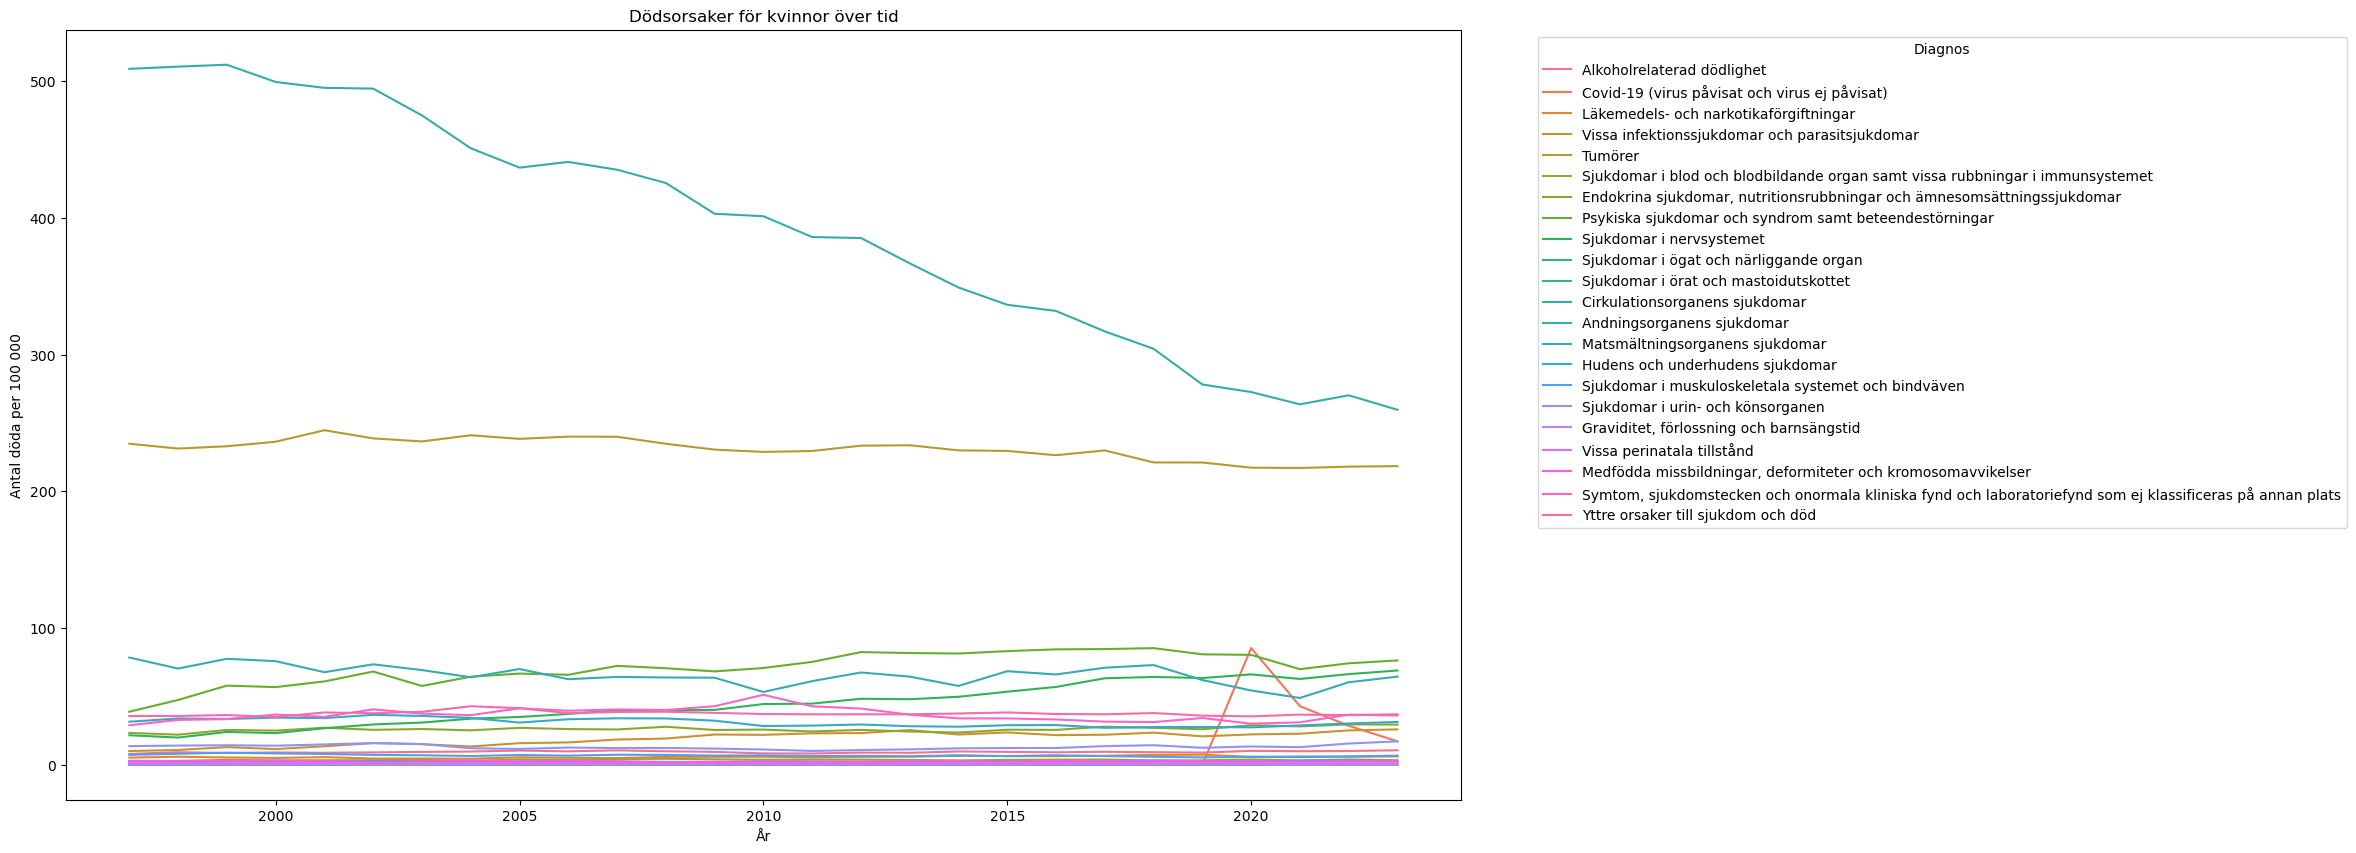

In [713]:
plt.figure(figsize = (18,10))
sns.lineplot(data =women_melted_df, x = 'År', y = 'Antal döda per 100 000', hue='Diagnos')
plt.title('Dödsorsaker för kvinnor över tid')
plt.ylabel('Antal döda per 100 000')
plt.xlabel('År')
plt.legend(title='Diagnos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

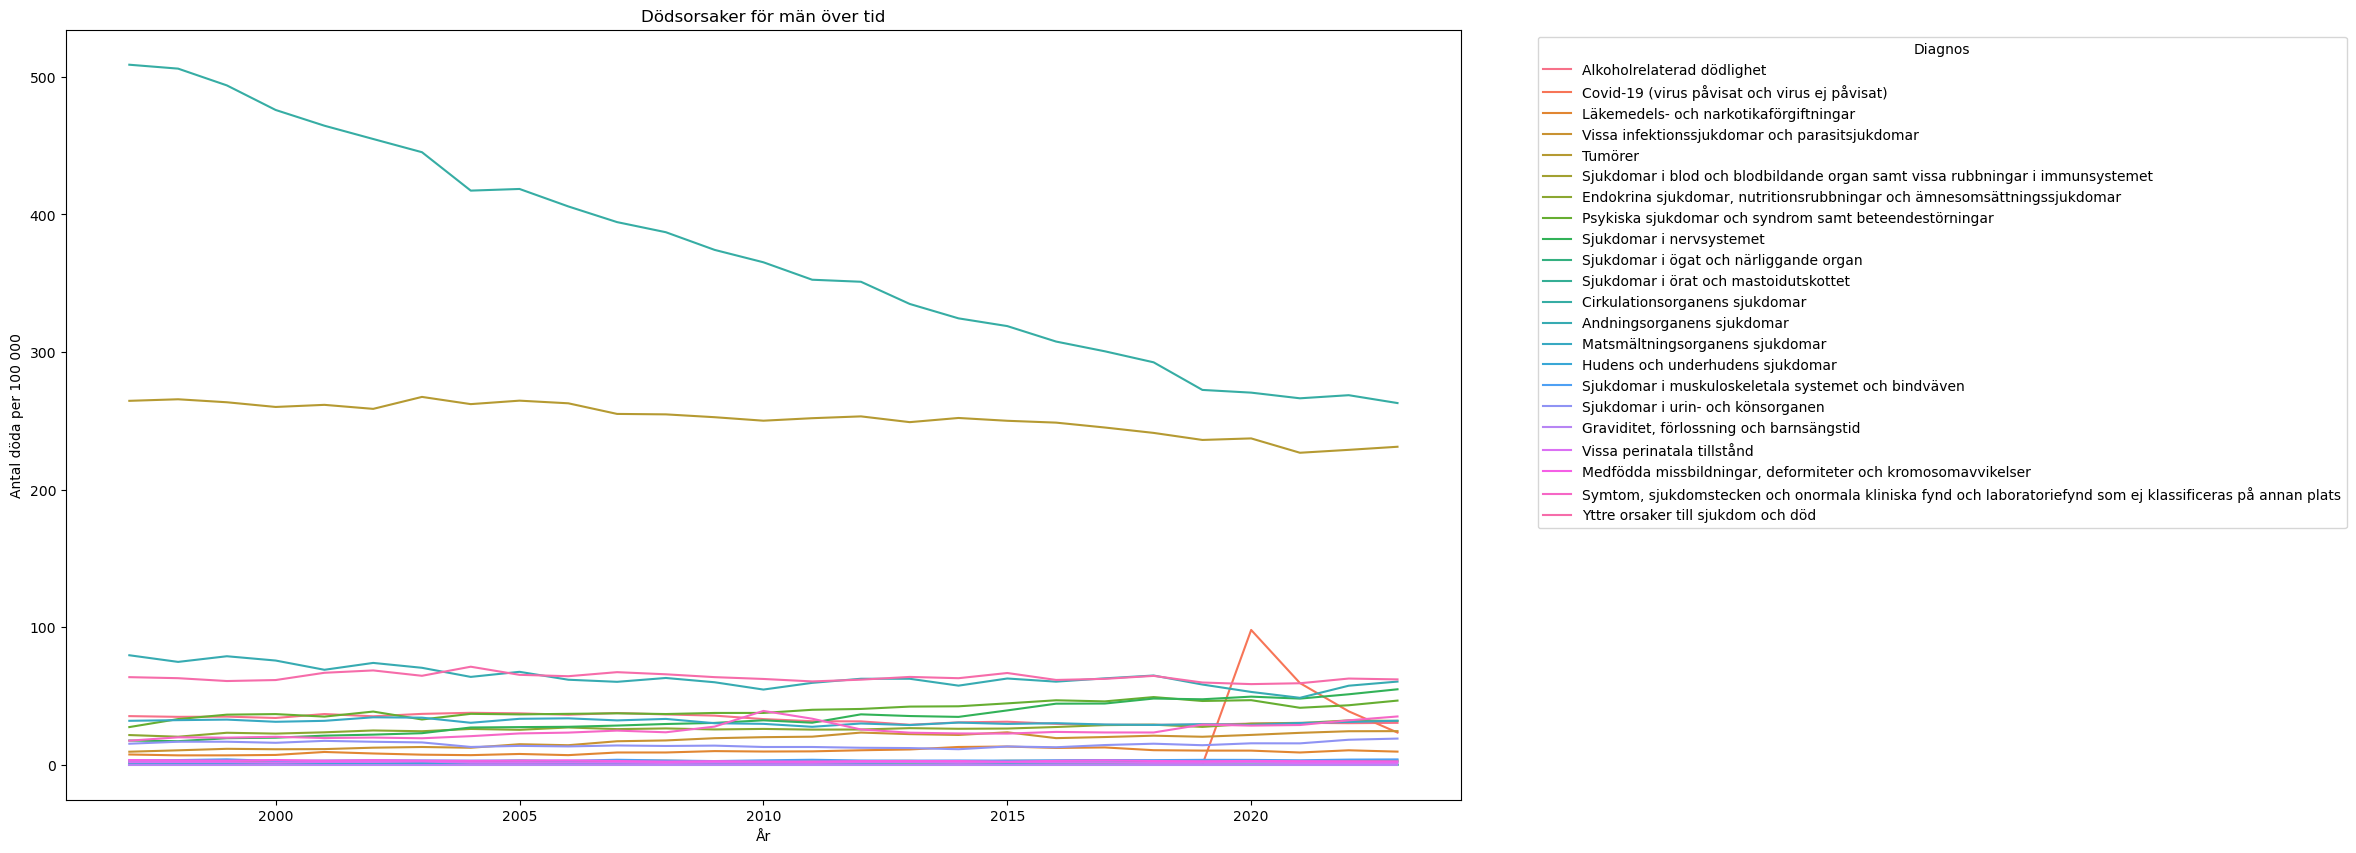

In [714]:
plt.figure(figsize = (18,10))
sns.lineplot(data =men_melted_df, x = 'År', y = 'Antal döda per 100 000', hue='Diagnos')
plt.title('Dödsorsaker för män över tid')
plt.ylabel('Antal döda per 100 000')
plt.xlabel('År')
plt.legend(title='Diagnos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Som kan ses i diagrammen så antalet döda med diagnosen cirkulationsorganens sjukdommar haft en negåtgående trend från 1997 tll 2023 för både män och kvinnor. Även om den ser ut att vara lite brantare för män. Vi kan även se att resterade dödsorsaker verkar ligga på ungefär samma nivåer som 1997. Vidare kan vi se att antalet döda i covid-19 hade sin peak 2020 och har sedan dess gått neråt.

Hur såg det ut under åren som covid-19 var? Var det några dödsorsaker som ändrades?

In [715]:
df_2023 = melted_df[melted_df['År']== 2023]
df_1997 = melted_df[melted_df['År']== 1997]

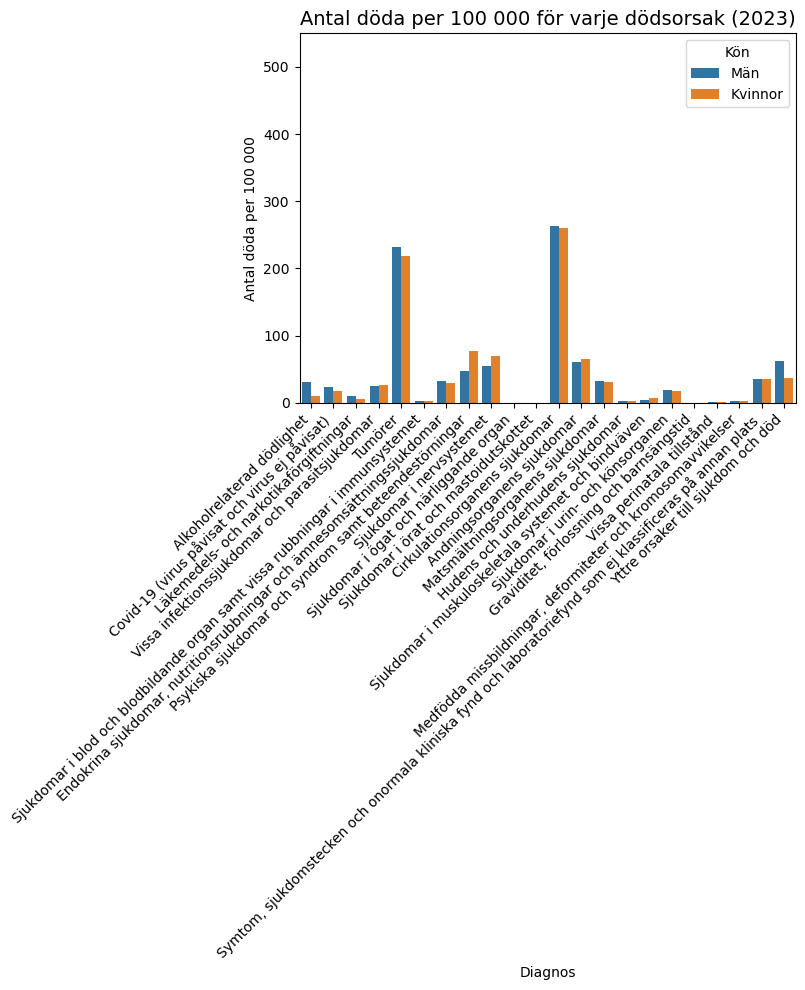

In [716]:
sns.barplot(data=df_2023, x='Diagnos', y='Antal döda per 100 000', hue= 'Kön')
plt.ylim(0,550)
plt.title("Antal döda per 100 000 för varje dödsorsak (2023)", fontsize=14)
#plt.xlabel("Diagnos", fontsize=8)
plt.ylabel("Antal döda per 100 000", fontsize =10)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Kön")
plt.show()

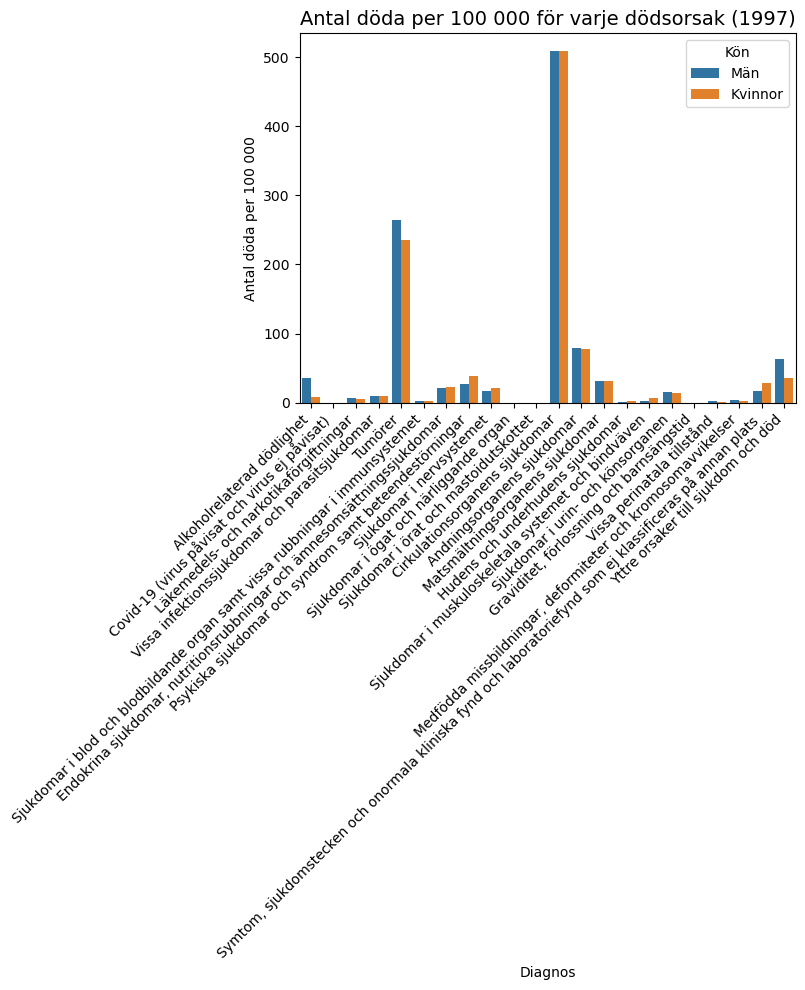

In [717]:
sns.barplot(data=df_1997, x='Diagnos', y='Antal döda per 100 000', hue= 'Kön')
plt.title("Antal döda per 100 000 för varje dödsorsak (1997)", fontsize=14)
#plt.xlabel("Diagnos", fontsize=8)
plt.ylabel("Antal döda per 100 000", fontsize =10)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Kön")
plt.show()

Disskutera skillnader i dödsorsaker mellan 2023 och 1997.

In [718]:
years_df = melted_df[melted_df['År'].isin([1997,2023])]

/Users/majaelmqvist/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


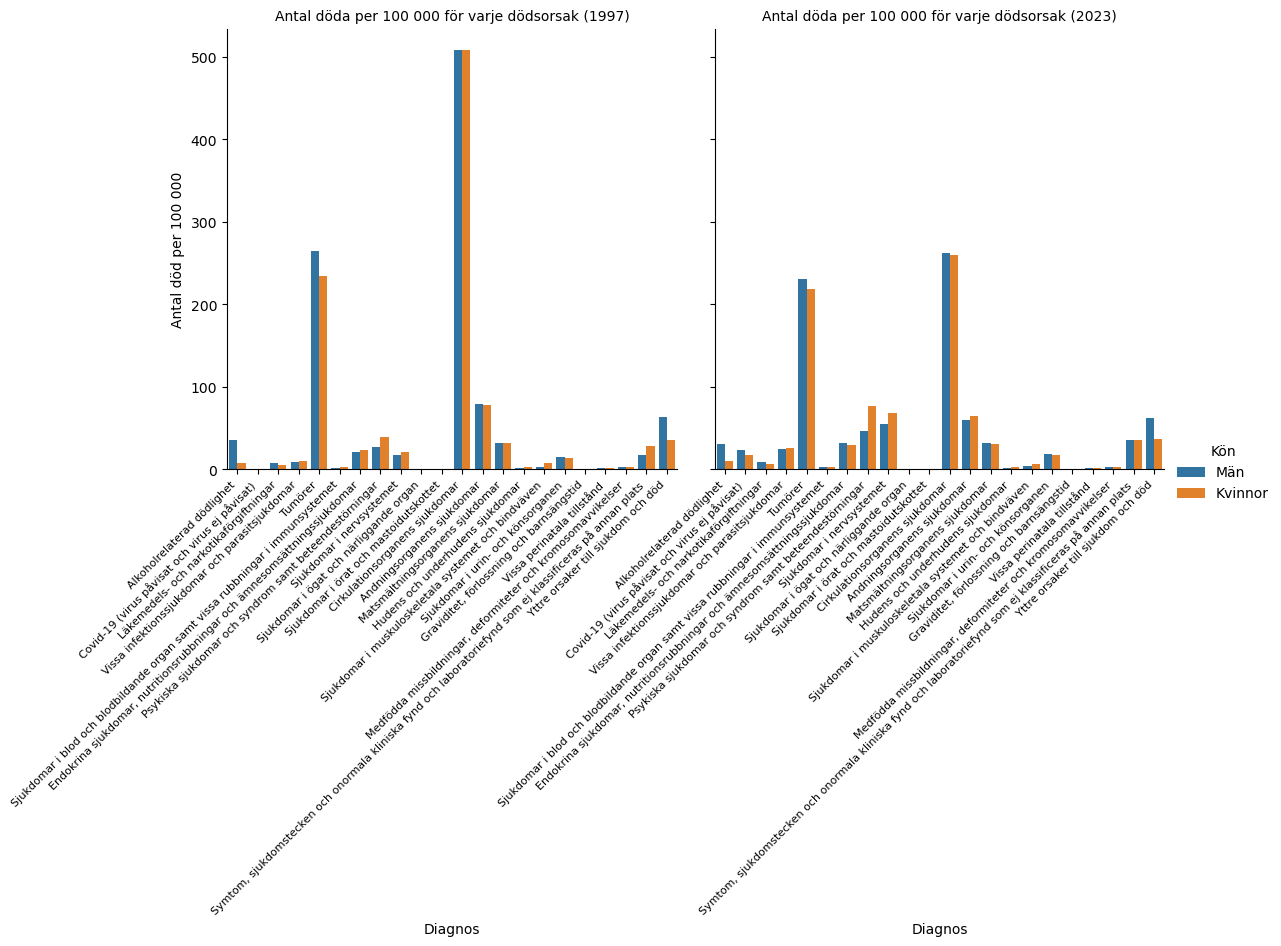

In [719]:
plot = sns.catplot(data=years_df, x='Diagnos', y='Antal döda per 100 000', hue= 'Kön', kind='bar', col='År', height=5, aspect=1)
plot.set_titles('Antal döda per 100 000 för varje dödsorsak ({col_name})')
plot.set_axis_labels('Diagnos', 'Antal död per 100 000')
plot.set_xticklabels(rotation= 45, ha = 'right', fontsize=8)
plt.show()

Vi vill nu undersöka hur antalet döda per 100 000kvinnor respektive män har förändrats från 1997 till 2023. Vi gör detta genom att undersöka den procentuella förändningen. Vi skapar en ny data frame och lägger till en kolumn "Procentuell förändning". Eftersom Covid-19 inte fanns år 1997 tar vi bort den från data framen eftersom det inte går att jämföra de två åren.

In [720]:
women_years_df = women_df[['Diagnos','1997', '2023']].drop(3) #drop covid19
women_years_df.loc[:,'Procentuell förändring'] = (((women_years_df['2023']-women_years_df['1997'])/women_years_df['1997'])*100).round(1)
women_years_df.loc[:, 'Absolut förändring'] = (women_years_df['2023']-women_years_df['1997'])

Vi vill nu plotta dessa för att enklare kunna visualisera förändningen. Vi gör dett med en barplot.

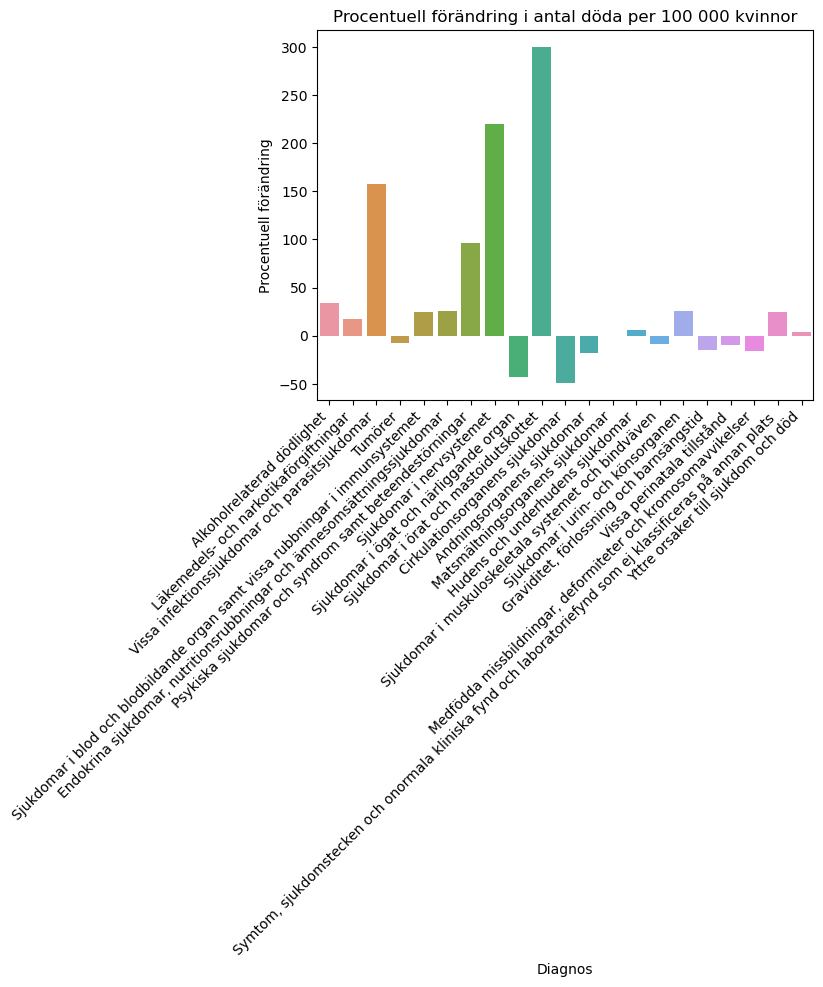

In [721]:
sns.barplot(data = women_years_df, x = 'Diagnos', y= 'Procentuell förändring')
plt.xticks(rotation = 45, ha= 'right')
plt.title('Procentuell förändring i antal döda per 100 000 kvinnor')
plt.show()

Vi gör nu samma sak för män. 

In [722]:
men_years_df = men_df[['Diagnos','1997', '2023']] #drop covid19
men_years_df.loc[:, 'Procentuell förändring'] = (((men_years_df['2023']-men_years_df['1997'])/men_years_df['1997'])*100).round(1)
men_years_df.loc[:, 'Absolut förändring'] = men_years_df['2023']-men_years_df['1997']

/var/folders/sj/fz9n44sj26bblghntnb8bbrr0000gn/T/ipykernel_42481/891708805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_years_df.loc[:, 'Procentuell förändring'] = (((men_years_df['2023']-men_years_df['1997'])/men_years_df['1997'])*100).round(1)
/var/folders/sj/fz9n44sj26bblghntnb8bbrr0000gn/T/ipykernel_42481/891708805.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_years_df.loc[:, 'Absolut förändring'] = men_years_df['2023']-men_years_df['1997']


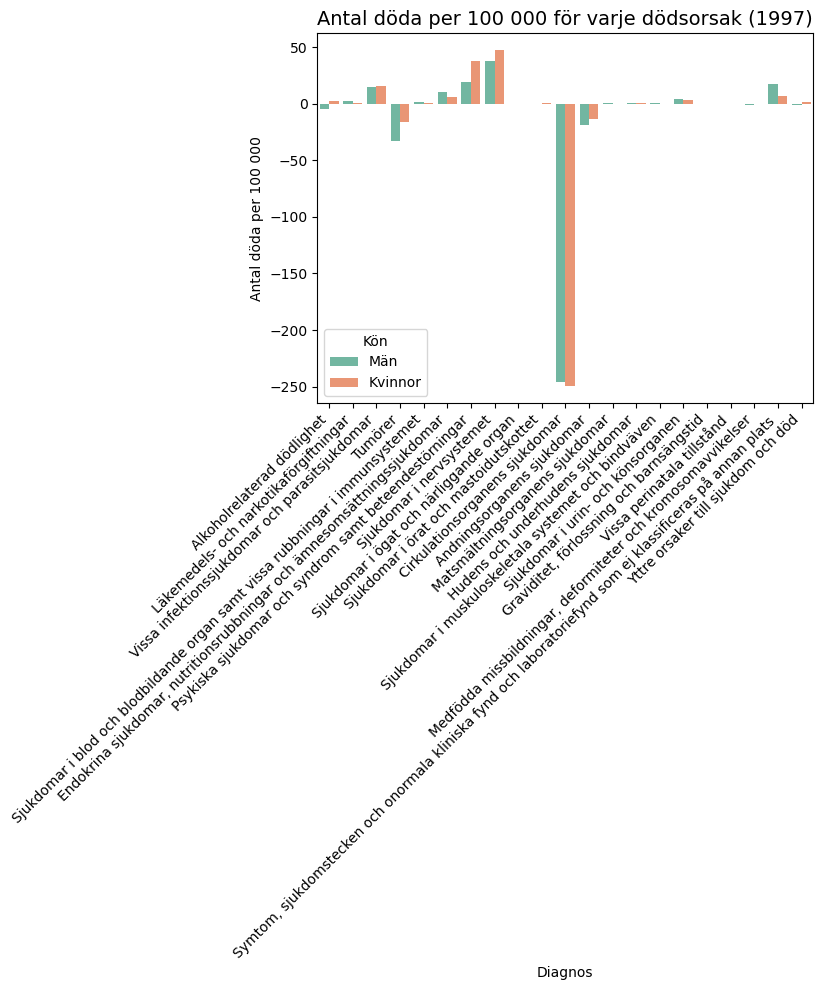

In [745]:
change_df = cleaned_df[['Diagnos', 'Kön','1997', '2023']].drop([2,3]) #drop covid19
change_df.loc[:, 'Relativ förändring'] = (((change_df['2023']-change_df['1997'])/change_df['1997'])).round(1)
change_df.loc[:, 'Absolut förändring'] = change_df['2023']-change_df['1997']

sns.barplot(data=change_df, x='Diagnos', y='Absolut förändring', hue= 'Kön', palette = 'Set2')
plt.title("Antal döda per 100 000 för varje dödsorsak (1997)", fontsize=14)
#plt.xlabel("Diagnos", fontsize=8)
plt.ylabel("Antal döda per 100 000", fontsize =10)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Kön")
plt.show()

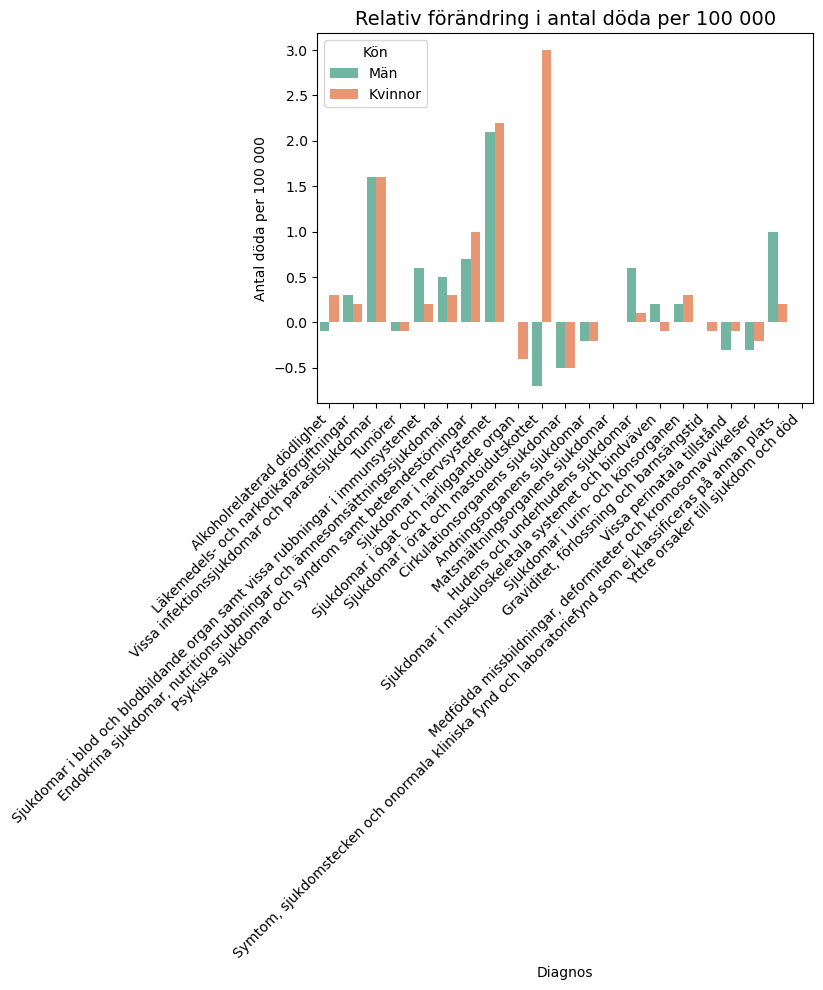

In [747]:
sns.barplot(data=change_df, x='Diagnos', y='Relativ förändring', hue= 'Kön', palette = 'Set2')
plt.title("Relativ förändring i antal döda per 100 000", fontsize=14)
#plt.xlabel("Diagnos", fontsize=8)
plt.ylabel("Antal döda per 100 000", fontsize =10)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Kön")
plt.show()

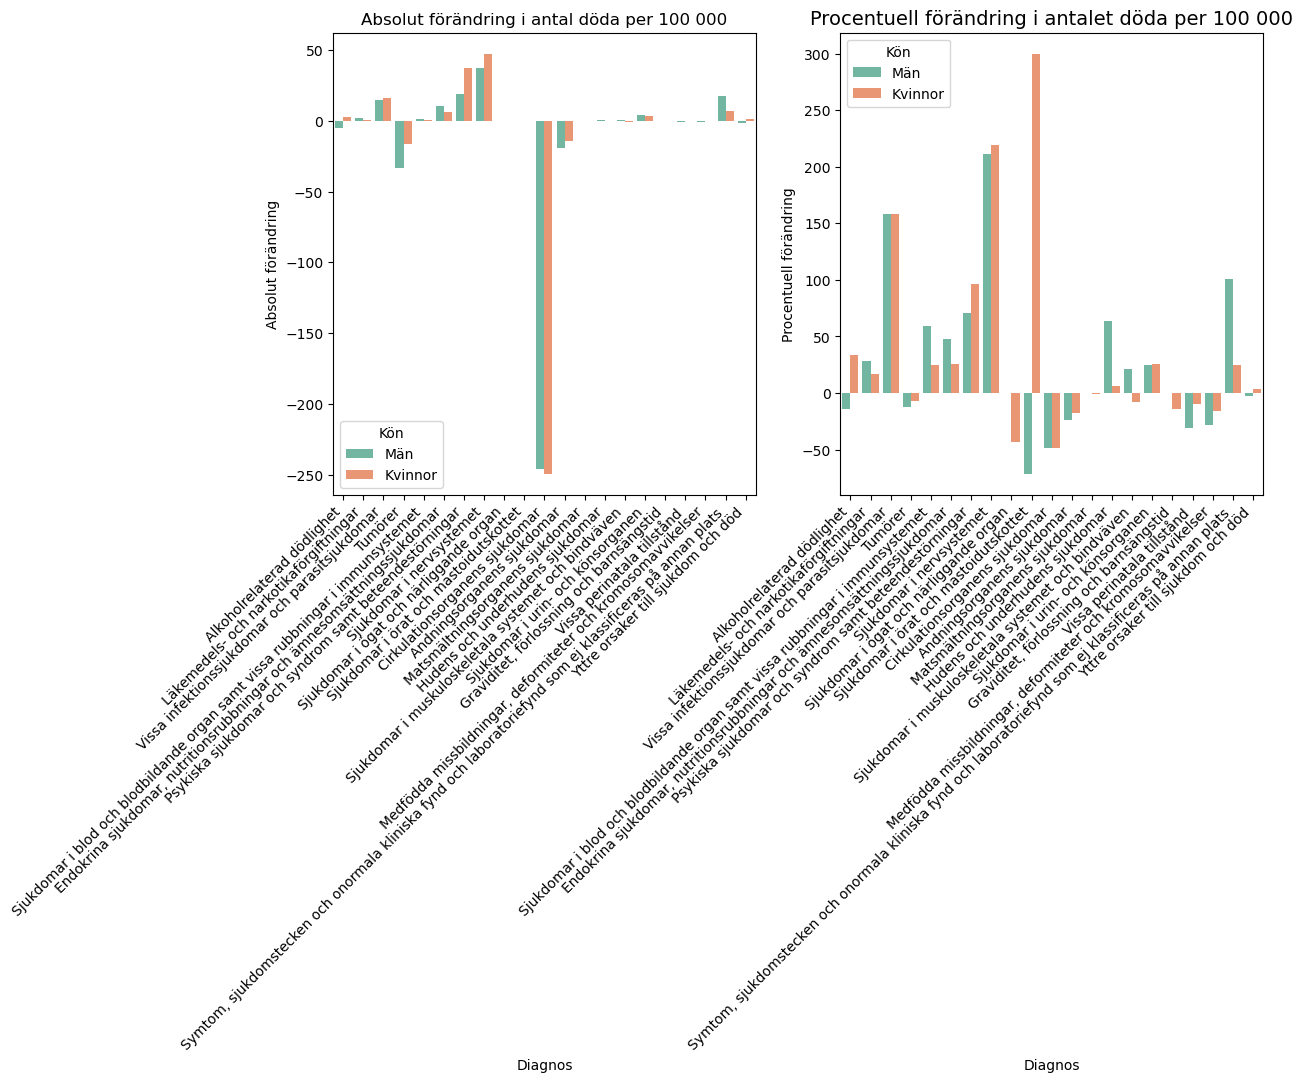

In [741]:

fig, axes = plt.subplots(1,2, figsize = (12, 6))
sns.barplot(data=change_df, x='Diagnos', y='Absolut förändring', hue= 'Kön', palette = 'Set2', ax= axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation= 45, ha='right')
axes[0].set_title('Absolut förändring i antal döda per 100 000')
sns.barplot(data=change_df, x='Diagnos', y='Procentuell förändring', hue= 'Kön', palette = 'Set2', ax = axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation= 45, ha='right')
axes[1].set_title('Procentuell förändring i antalet döda per 100 000')
plt.title("Procentuell förändring i antalet döda per 100 000", fontsize=14)
plt.show()

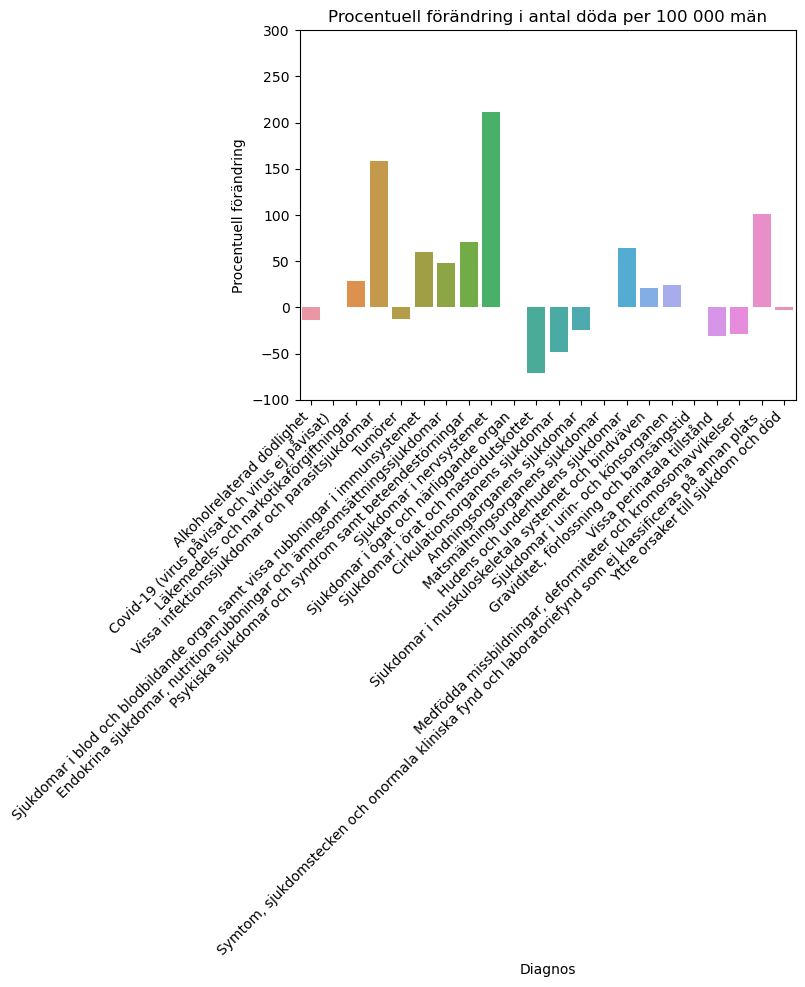

In [725]:
sns.barplot(data = men_years_df, x = 'Diagnos', y= 'Procentuell förändring')
plt.ylim(-100,300)
plt.xticks(rotation = 45, ha= 'right')
plt.title('Procentuell förändring i antal döda per 100 000 män')
plt.show()

Vi lägger nu plottarna bredvid varandra.